### Imports

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics for classification models
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, auc

# For splitting data in traid, test and validation splits
from sklearn.model_selection import train_test_split

# Classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For selecting features
from sklearn.feature_selection import VarianceThreshold

# Setting up a pipeline
from sklearn.pipeline import Pipeline

# Pre-processing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV

# Resampling
from imblearn.over_sampling import SMOTE

### Load Data

In [18]:
# Set the path to the data directory
data_dir = 'data'

# Import numeric dataset
numeric_data_path = os.path.join(data_dir, 'numeric', 'star_classification.csv')
df = pd.read_csv(numeric_data_path)

### Encode Target Feature

In [19]:
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])

### Exploratory Data Analysis - EDA

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  int32  
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int32(1),

In [21]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


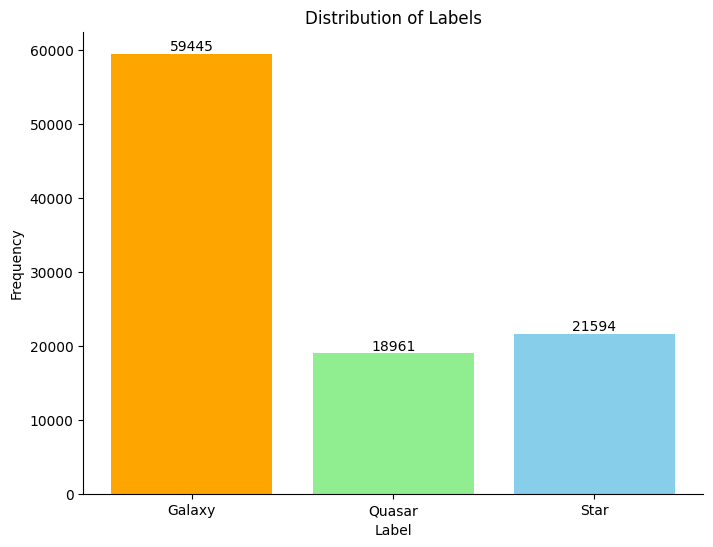

In [23]:
# Count the occurrences of each class
class_counts = df['class'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(class_counts.index, class_counts.values, color=['orange', 'skyblue', 'lightgreen'])

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Add counts on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{int(bar.get_height())}', ha='center', va='bottom')


plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.xticks(class_counts.index, ['Galaxy', 'Star', 'Quasar'])
plt.show()

### Selecting Features

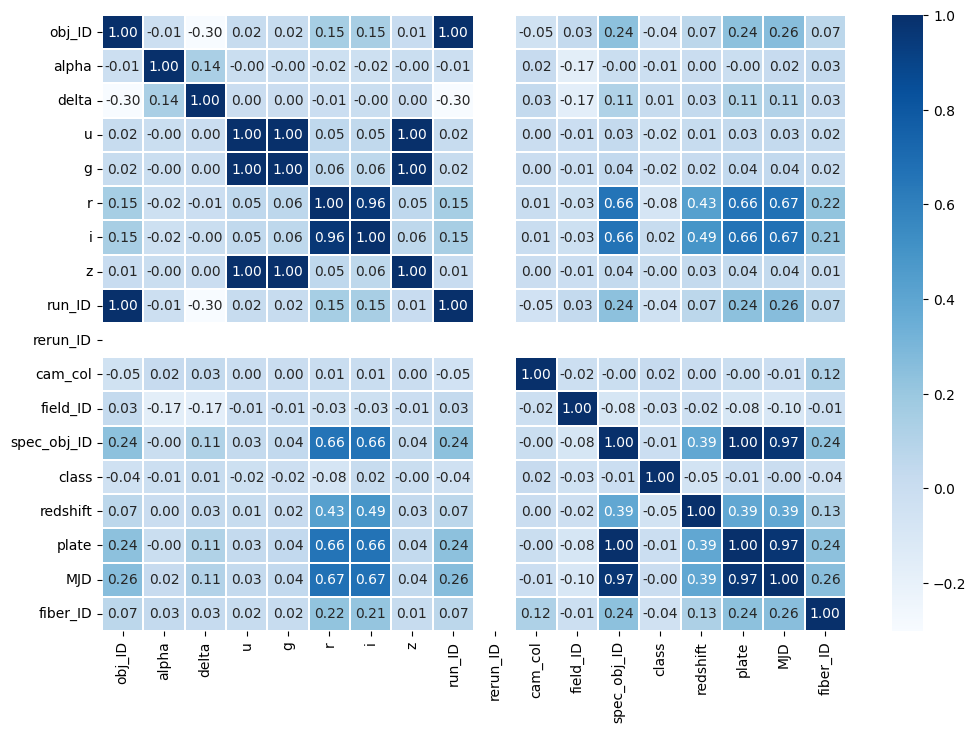

In [24]:
# Plot correlation matrix as heatmap
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.2, fmt=".2f")
plt.show()

In [25]:
corr_matrix['class'].sort_values()

r             -0.076766
redshift      -0.054239
fiber_ID      -0.041586
run_ID        -0.036014
obj_ID        -0.036012
field_ID      -0.034833
u             -0.024645
g             -0.020066
alpha         -0.011756
spec_obj_ID   -0.010060
plate         -0.010060
z             -0.001614
MJD           -0.000405
delta          0.014452
i              0.015028
cam_col        0.023138
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

### Remove Unnecessary Features
Removing features that will not contribute much towards the objective for this project can significantly improve the performence of the models. Some of the ID features do not contribute much and are therefore up for removal

In [26]:
df.drop(columns=['fiber_ID', 'run_ID', 'obj_ID', 'field_ID', 'spec_obj_ID', 'rerun_ID'])

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,0,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,0,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,0,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,0,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,0,0.116123,6121,56187
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,2,0,0.000000,9374,57749
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,1,0,0.404895,7626,56934
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,4,0,0.143366,2764,54535
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,4,0,0.455040,6751,56368


### Set X and y variables

In [27]:
# Select X and y features
X = df.drop(columns=['class'])
y = df['class']

### Resampling

In [28]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

### Split data

In [29]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

### Distribution of classes

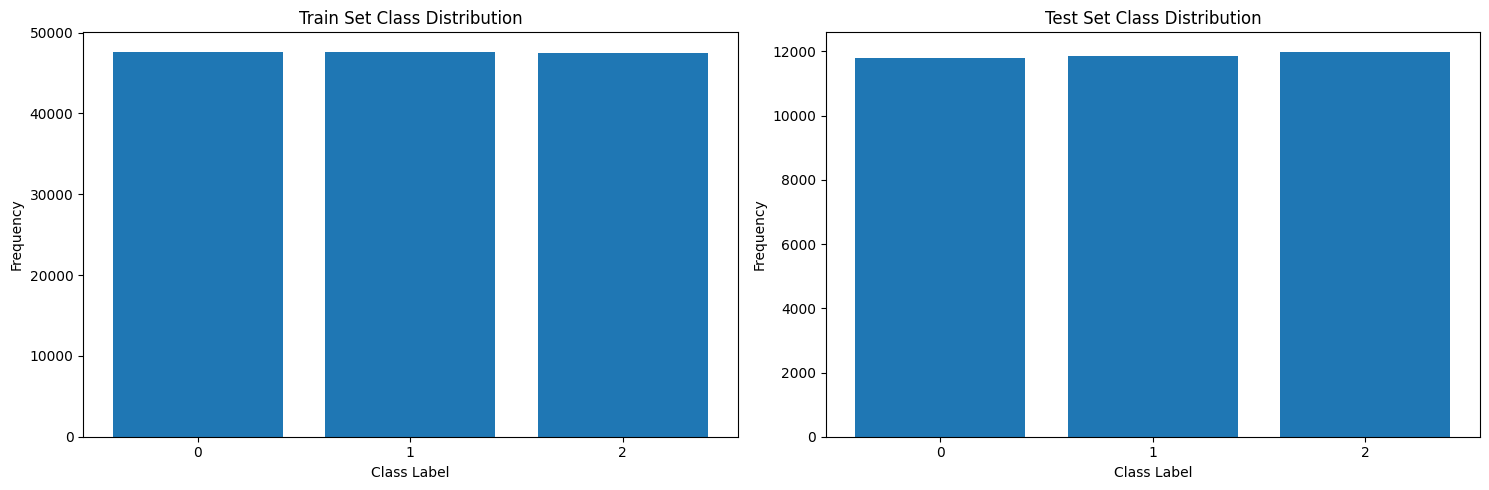

In [31]:
train_unique, train_counts = np.unique(y_train, return_counts=True)
test_unique, test_counts = np.unique(y_test, return_counts=True)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].bar(train_unique, train_counts)
axes[0].set_title('Train Set Class Distribution')
axes[0].set_xlabel('Class Label')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(train_unique)

axes[1].bar(test_unique, test_counts)
axes[1].set_title('Test Set Class Distribution')
axes[1].set_xlabel('Class Label')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(test_unique) 

plt.tight_layout()
plt.show()


### Standardize

In [14]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Selection

In [15]:
classification_reports = {}
confusion_matrices = {}

models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    classification_reports[name] = classification_report(y_test, y_pred, output_dict=True)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

c:\Users\Eric\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
results = {}

# Loop through the classification reports
for model, report in classification_reports.items():
    # Extract relevant metrics
    accuracy = report['accuracy']
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score_value = report['macro avg']['f1-score']
    
    # Store results in the dictionary
    results[model] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score_value}


results_df = pd.DataFrame.from_dict(results, orient='index')
results_df

,Accuracy,Precision,Recall,F1-Score
KNN,0.924468,0.925755,0.924446,0.924808
Logistic Regression,0.960215,0.960146,0.960044,0.959954
SVM,0.967281,0.967417,0.967149,0.967125
Decision Tree,0.973589,0.973488,0.973477,0.973481
Random Forest,0.984215,0.984172,0.984152,0.984143


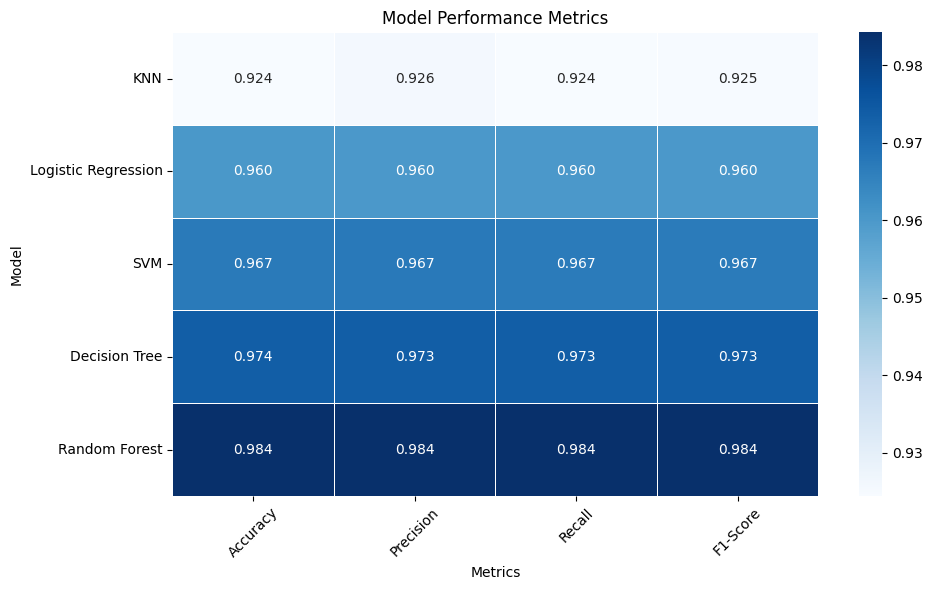

In [55]:
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, cmap='Blues', fmt='.3f', linewidths=.5)
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Model')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

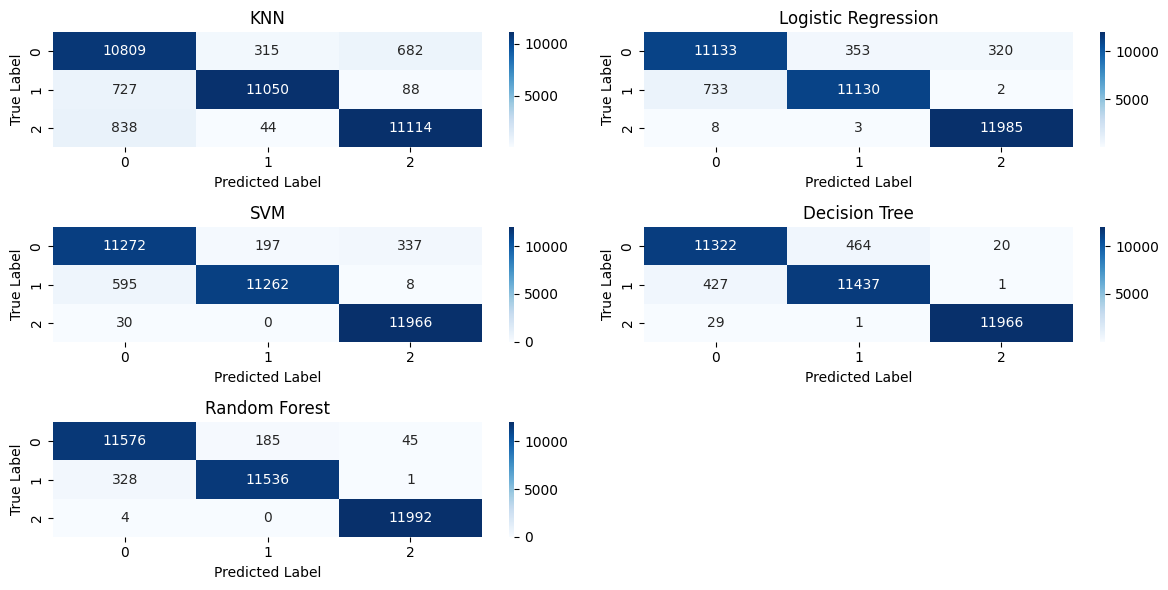

In [ ]:
# Calculate the number of rows and columns for the subplot grid
num_models = len(confusion_matrices)
num_rows = int(np.ceil(np.sqrt(num_models)))
num_cols = int(np.ceil(num_models / num_rows))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

# Flatten the axes array if necessary
if num_models == 1:
    axes = [axes]

# Loop through the models and confusion matrices
for (model, matrix), ax in zip(confusion_matrices.items(), axes.flatten()):
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='d', ax=ax)
    ax.set_title(model)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

for i in range(num_models, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()

plt.show()


### Improving Selected Models
Top 3 models were chosen from last step. This could however lead to model bias as some models work better with better defined hyperparameters, although none of the models were that far apart from each other so testing KNN and Logistic Regression (OvR) could work here as well

In [21]:
models = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

param_grid = {
    'SVM': {'C': [0.1, 1]},
    'Decision Tree': {'max_depth': [None, 10], 'min_samples_split': [2, 5]},
    'Random Forest': {'max_depth': [None, 10], 'n_estimators': [25, 50]}
}

results = []

for model_name, model in models.items():
    param_grid_model = param_grid[model_name]
    grid_search = GridSearchCV(model, param_grid_model, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    results.append((model_name, grid_search.best_params_, grid_search.best_score_))
        
results_df = pd.DataFrame(results, columns=['Model', 'Best Params', 'Best Score'])

In [22]:
results_df

,Model,Best Params,Best Score
0,SVM,{'C': 1},0.964996
1,Decision Tree,"{'max_depth': 10, 'min_samples_split': 2}",0.976841
2,Random Forest,"{'max_depth': None, 'n_estimators': 50}",0.982133


### Final Model
Since we tried 3 different models before to see which one would perform best when adjusting some of its hyperparameters, now its time to pick out and fine tune the best model with better (if possible) hyperparameters and see how well it performs

In [28]:
rf = RandomForestClassifier()

param_grid = {
    'max_depth': [None, 3, 6],
    'n_estimators': [30, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]   
}

grid_search = GridSearchCV(rf, param_grid, cv=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 6],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [30, 50, 70]},
             scoring='accuracy')

Final model with the best hyperparams found from gridsearch

In [33]:
rf_model = RandomForestClassifier(**grid_search.best_params_)

rf_model.fit(X_train, y_train)

y_pred_final = rf_model.predict(X_test)


In [36]:
accuracy_final = accuracy_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final, average='macro')
recall_final = recall_score(y_test, y_pred_final, average='macro')
f1_score_value_final = f1_score(y_test, y_pred_final, average='macro')

conf_matrix_final = confusion_matrix(y_test, y_pred_final)

In [46]:
metrics_df = pd.DataFrame({
    'Accuracy': [accuracy_final],
    'Precision': [precision_final],
    'Recall': [recall_final],
    'F1-Score': [f1_score_value_final]
})

metrics_df.index = ['Random Forest']

In [56]:
metrics_df

,Accuracy,Precision,Recall,F1-Score
Random Forest,0.984047,0.983992,0.98398,0.98397


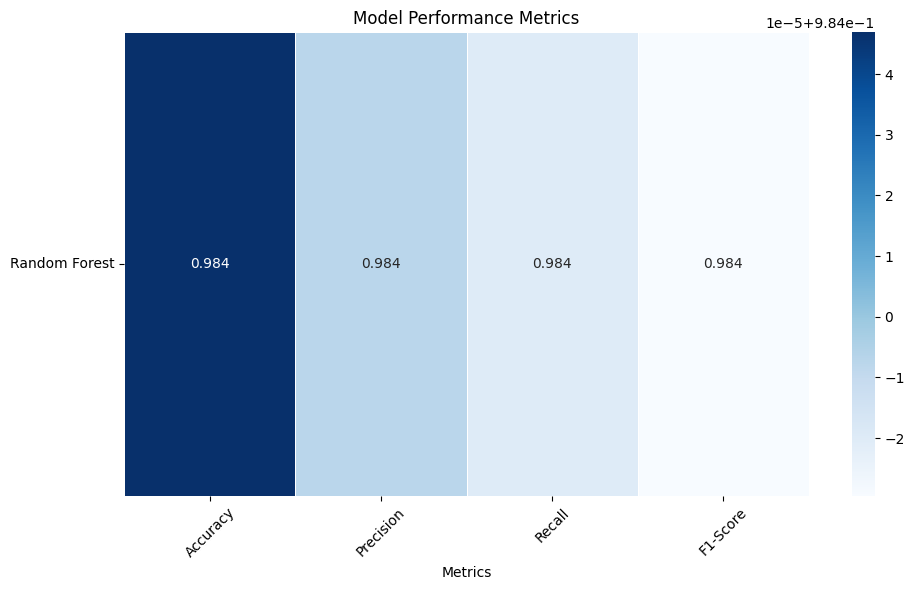

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='Blues', fmt='.3f', linewidths=.5)
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


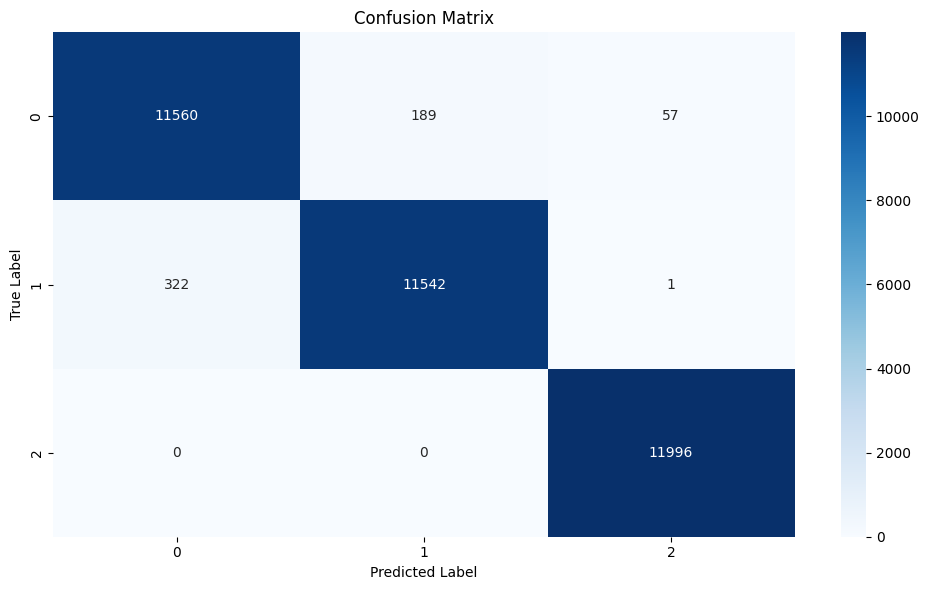

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_final, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()